In [1]:
import os

In [2]:
os.sys.path.append('/root/End2End')
os.sys.path.append('/root/End2End/v1')

In [3]:
from utils.trainer import Engine
from v1.config import GlobalConfig
from v1.carla_data import CARLA_Data

In [4]:
import os, torch, torchvision
from numpy import isin
import torch.nn as nn
import torch.optim as optim
from torchvision.models._utils import IntermediateLayerGetter
import torch.nn.functional as F
from optimizer_loss import Optimizer
from torch.utils.data import DataLoader

In [5]:
config = GlobalConfig()

In [6]:
val_set = CARLA_Data(root=config.val_data, config=config)

  0%|          | 0/2 [00:00<?, ?it/s]loading 1011 frames from routes_town02_short_10_08_06_44_10
loading 507 frames from routes_town03_short_10_08_09_20_46
100%|██████████| 2/2 [00:00<00:00, 1009.58it/s]


In [7]:
dataloader_val = DataLoader(val_set, batch_size=1, shuffle=False, num_workers=1, pin_memory=True)

In [8]:
from Demo import ImagineNet

In [9]:
model = ImagineNet(config).to(config.device)

In [33]:
if isinstance(model, nn.DataParallel):
      model.module.load_state_dict(torch.load(os.path.join('/root/End2End/v1/log/ImagineNet_2', 'best_model.pth')))
else:
      model.load_state_dict(torch.load(os.path.join('/root/End2End/v1/log/ImagineNet_2', 'best_model.pth')))

In [11]:
iter_ = dataloader_val.__iter__()

In [12]:
data = iter_.__next__()

In [34]:
data_in, label = model.data_preprocess(data)

In [35]:
pred = model(data_in)

In [15]:
pred[1].shape

torch.Size([1, 4, 4, 128, 32, 32])

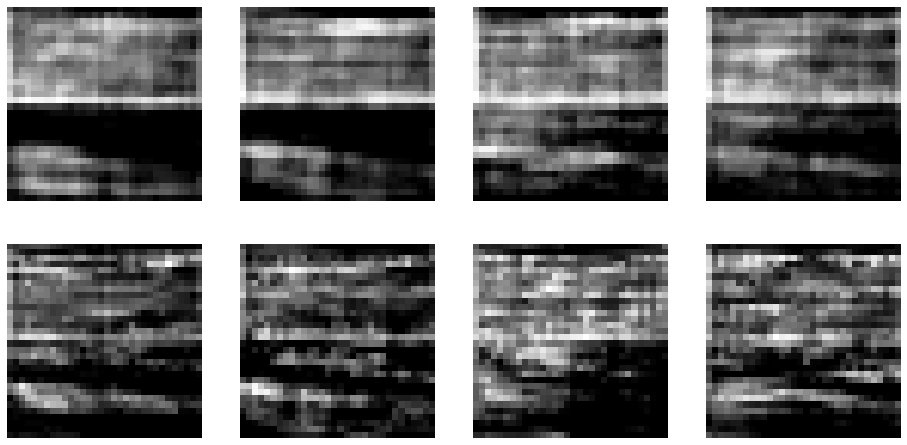

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 8.0) 
f, axarr = plt.subplots(2, 4)
for i in range(4):
    axarr[0][i % 4].axis('off')
    axarr[0][i % 4].imshow(pred[1][0,0,i, 0].detach().cpu(), cmap='Greys_r')
    axarr[1][i % 4].axis('off')
    axarr[1][i % 4].imshow(label[0,0,i,0].detach().cpu(), cmap='Greys_r')
# plt.imshow(seg[7][:,:].detach().cpu(), cmap='Greys_r')

plt.show()

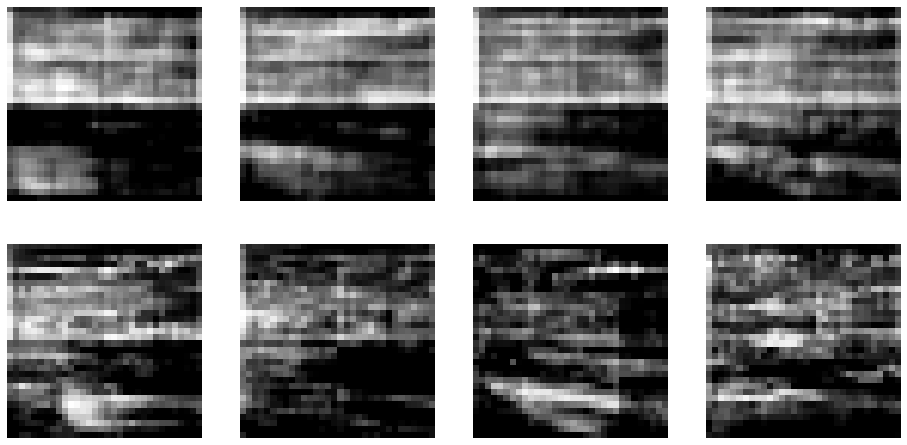

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 8.0) 
f, axarr = plt.subplots(2, 4)
for i in range(4):
    axarr[0][i % 4].axis('off')
    axarr[0][i % 4].imshow(pred[1][0,0,i, 0].detach().cpu(), cmap='Greys_r')
    axarr[1][i % 4].axis('off')
    axarr[1][i % 4].imshow(label[0,0,i,0].detach().cpu(), cmap='Greys_r')
# plt.imshow(seg[7][:,:].detach().cpu(), cmap='Greys_r')

plt.show()

In [17]:
label.mean()

tensor(1.7191, device='cuda:2')

In [27]:
pred_img = model.erfnet.decoder(pred[1].view(-1, 128, 32, 32))
label_image = model.erfnet.decoder(label.view(-1, 128, 32, 32))

In [28]:
pred_img = pred_img.argmax(dim=1)

In [29]:
label_image = label_image.argmax(dim=1)

In [21]:
pred_img.shape

torch.Size([16, 256, 256])

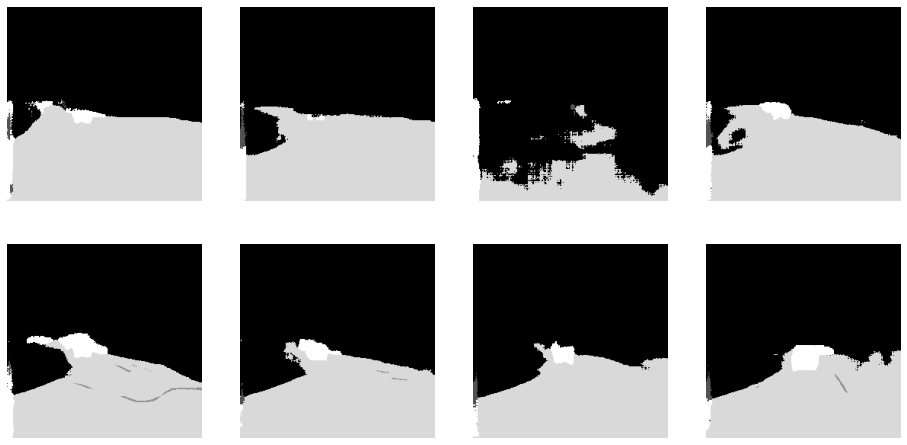

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 8.0) 
f, axarr = plt.subplots(2, 4)
for i in range(4):
    axarr[0][i % 4].axis('off')
    axarr[0][i % 4].imshow(pred_img[i+8].detach().cpu(), cmap='Greys_r')
    axarr[1][i % 4].axis('off')
    axarr[1][i % 4].imshow(label_image[i+8].detach().cpu(), cmap='Greys_r')
# plt.imshow(seg[7][:,:].detach().cpu(), cmap='Greys_r')

plt.show()